# Python Assignment 
**Vencke Gruening**  
**Date: May 2025**

## Overview

This assignment includes the development of a Jupyter notebook using Python 3. The notebook is designed to:

- Translate a mitochondrial DNA sequence from a FASTA file into an amino acid sequence
- Determine the molecular weight of the translated amino acid sequence
- Calculate the GC content of the DNA sequence
- Perform basic exploratory data analysis using bar plots and scatter plots

To ensure the notebook runs correctly, please follow these setup steps:

1. **Install Biopython** using the command:  
   `pip install biopython`
2. **Load the necessary modules** from the Biopython library (see code cells below)
3. **Install and import** the Python packages `pandas` and `numpy`. If they are not already installed, run:  
   `pip install pandas numpy`

In [1]:
!pip install biopython 

from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils.ProtParam import ProteinAnalysis

Defaulting to user installation because normal site-packages is not writeable


### 1 Get Sequences Function 

In [2]:
def get_sequences_from_file(fasta_fn):
    
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict



    Description:
        Extracts DNA sequences from a FASTA file and stores them in a dictionary.

    Input:
        Path to the FASTA file containing DNA sequences.

    Output:
        A dictionary with keys as species names and values for the corresponding sequences.
        

### 2 String Translate Function 

In [3]:
def translate_sequence_mitochondrial(nucleotide_seq):

    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    seq_str = str(nucleotide_seq)

    for i in range(0, len(seq_str) - 2, 3):
        codon = seq_str[i:i+3]
        if codon in mito_table.stop_codons:
            break
        if codon in mito_table.forward_table:
            aa_seq_string += mito_table.forward_table[codon]
        else:
            aa_seq_string += "X"  

    return aa_seq_string


 
    Description:
        Translates a nucleotide sequence into an amino acid sequence using the Vertebrate Mitochondrial codon table.

    Input:
       DNA sequence to be translated.

    Output:
        Translated amino acid sequence as a string.
    

In [4]:
# As a checkpoint print the codon table for confirmation
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

### 3 Alternative Function

In [5]:
def translate_sequence_biopython(nucleotide_seq):
    seq = Seq(nucleotide_seq)
    aa_seq = seq.translate(to_stop=True)
    return str(aa_seq)



    Description:
        Translates a nucleotide sequence into an amino acid sequence using Biopython's built-in translate method.
        
    Input:
        DNA sequence to be translated.

    Output:
        Translated amino acid sequence as a string.
    

### 4 Count AA Analysis Function

In [6]:
def compute_molecular_weight(aa_seq):
    analysis = ProteinAnalysis(str(aa_seq))
    molecular_weight = analysis.molecular_weight()
    return molecular_weight



    Description: 
        This function calculates the molecular weight of an amino acid sequence using BioPython's ProteinAnalysis.

    Input: 
        A string representing the amino acid sequence.
        
    Output: 
        The molecular weight of the amino acid sequence.
 

### 5 GC Content Analysis Function 

In [7]:
def calculate_gc_content(dna_seq):
    gc_count = dna_seq.count('G') + dna_seq.count('C')
    gc_content = gc_count / len(dna_seq)
    return gc_content

 
    Description: 
        This function calculates the GC-content (proportion of 'G' and 'C') in a DNA sequence.
        
    Input: 
        A string representing the DNA sequence.
        
    Output: 
        The proportion of 'G' and 'C' nucleotides in the sequence.
   

### 6 Add new columns

In [8]:
import pandas as pd
import numpy as np

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

penguins_df['molecular_weight'] = np.nan
penguins_df['gc_content'] = np.nan

### 7 Write for loop

In [10]:
for key, value in cytb_seqs.items():
    aa_seq = translate_sequence_biopython(value)  
    mol_weight = compute_molecular_weight(aa_seq)         
    gc_cont = calculate_gc_content(value)         
    
    # Add data to DataFrame
    penguins_df.loc[penguins_df['species'] == key, 'molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df['species'] == key, 'gc_content'] = gc_cont


The code above is looping over the cytb_seqs dictionnary to 1. translate the DNA Sequences for each species, 2. calculate the Molecular Weight for each translated amino acid sequence, 3. compute the GC Content for each DNA sequence and 4. update the DataFrame. 

### 8 Plot bar-chart

<Axes: title={'center': 'Barplot of the mass of each species'}, xlabel='species'>

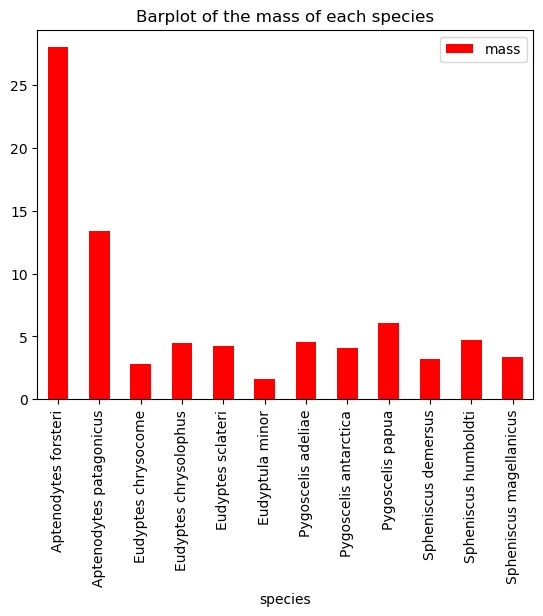

In [11]:
import matplotlib.pyplot as plt
penguins_df.plot(x = "species", y = "mass", kind = "bar", color = "red",
                 title = "Barplot of the mass of each species")

Q1 What is the smallest penguin species? 
    * The smallest penguin species is *Eudyptula minor*, based on body mass. 
    
Q2 What is the geographical range of this species?
    * Australia and New Zealand 

### 9 Plot a visualization 

<Axes: title={'center': 'Relationship between GC Content and Molecular Weight'}, xlabel='gc_content', ylabel='molecular_weight'>

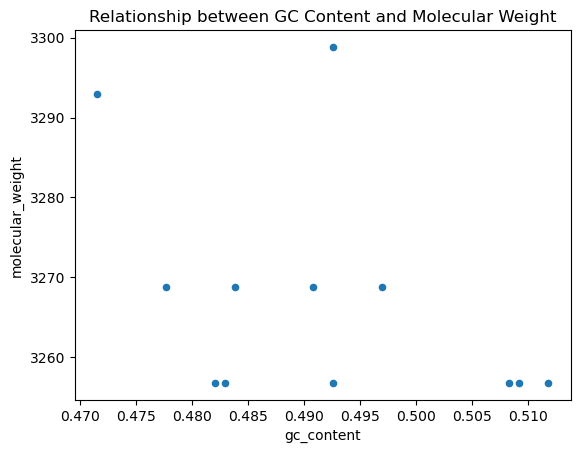

In [12]:
penguins_df.plot(x="gc_content", y="molecular_weight", kind="scatter",
                 title="Relationship between GC Content and Molecular Weight")

### 10 Save DataFrame

In [13]:
penguins_df.to_csv("penguins_mass_cytb.csv")

### 11 Bonus

In [18]:
penguins_df['gc_category'] = penguins_df['gc_content'].apply(lambda x: 'High GC' if x >= 0.5 else 'Low GC')

avg_mass_by_gc = penguins_df.groupby('gc_category')['mass'].mean()

print(avg_mass_by_gc)

gc_category
High GC    3.850000
Low GC     7.683333
Name: mass, dtype: float64


<Axes: title={'center': 'Average Body Mass by GC Content Category'}, xlabel='GC Content Category', ylabel='Average Body Mass'>

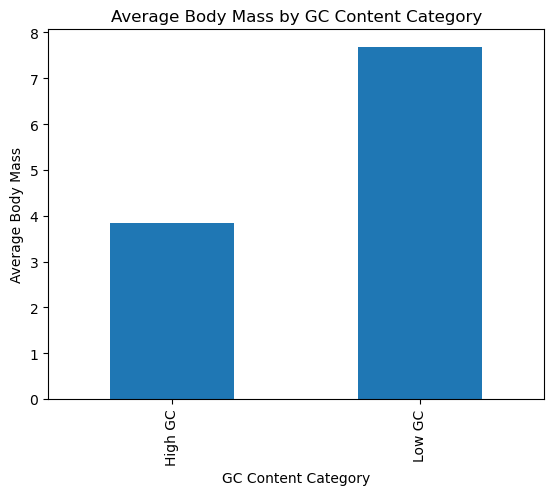

In [20]:
avg_mass_by_gc.plot(kind='bar', title='Average Body Mass by GC Content Category', xlabel='GC Content Category', ylabel='Average Body Mass')


I have created a new column that categorizes each penguin with high or low GC content, and tried to compare the average body mass between those groups. It seems penguins with low GC have a higher average body mass

References

https://biopython.org/wiki/Seq

http://biopython.org/wiki/ProtParam
